## Gradient Boosting from Scratch

### Gradient Boosting Function

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):
  if number == 0:
    return
  else:
    # do gradient boosting
    if count == 1:
      foo = y
      # pred will be mean
      x1 = np.linspace(-0.5, 0.5, 500) # Test X
      y_mean = np.full(100,  foo.mean())
      print(number)
      plt.figure()
      plt.plot(X[:, 0], y_mean, linewidth=2)
      plt.plot(X[:, 0], y,"r.")
      plt.show()

      # Residual Error
      y = y - y_mean
      gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

    else:
      tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
      tree_reg.fit(X, y)

      regs.append(tree_reg)

      # Prediction from Decision trees
      x1 = np.linspace(-0.5, 0.5, 500) # Test X
      y_mean = np.full(500,  foo.mean())
      y_pred = y_mean + sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

      print(number)
      plt.figure()
      plt.plot(x1, y_pred, linewidth=2)
      plt.plot(X[:, 0], foo,"r.")
      plt.show()

      # Residual Error
      y = y - regs[-1].predict(X)
      gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)


5


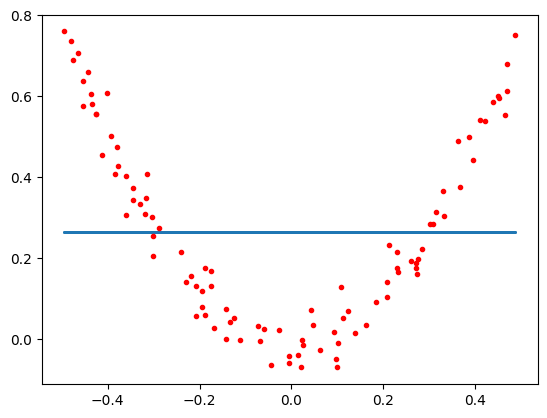

4


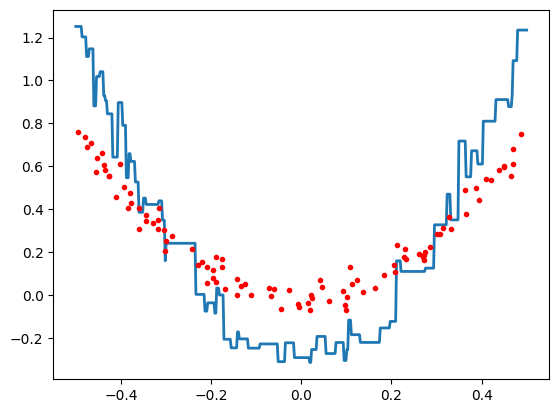

3


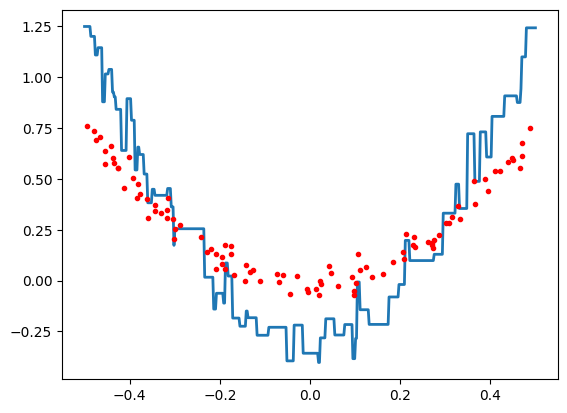

2


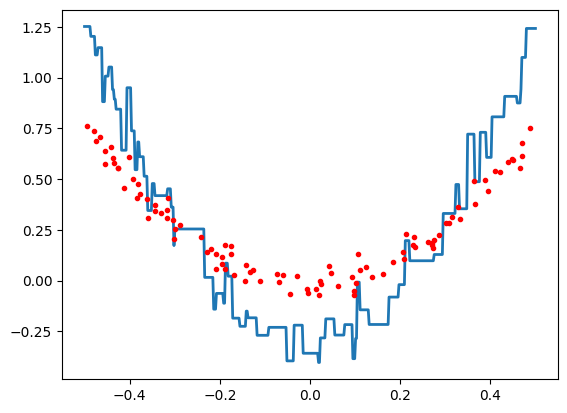

1


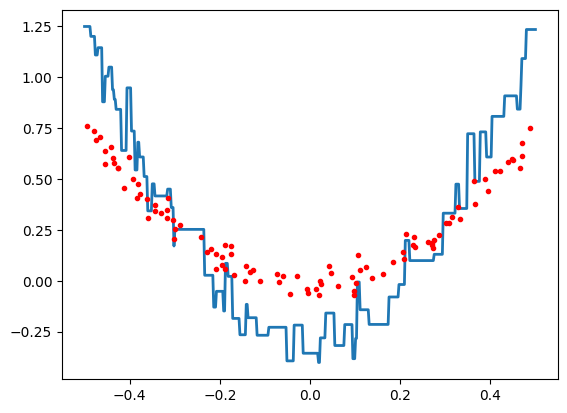

In [127]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)

## GD Regression

In [90]:
# Import the necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes

# Setting SEED for reproducibility
SEED = 23

# Importing the dataset 
X, y = load_diabetes(return_X_y=True)

# Splitting dataset
train_X, test_X, train_y, test_y = train_test_split(X, y, 
													test_size = 0.2, 
													random_state = SEED)

# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(loss='squared_error',
								learning_rate=0.02,
								n_estimators=300,
								max_depth = 3, 
								random_state = SEED,
								max_features = 5)

# Fit to training set
gbr.fit(train_X, train_y)

# Predict on test set
pred_y = gbr.predict(test_X)

# test set r2 score
test_rmse = r2_score(test_y, pred_y)

# Print rmse
print('Root mean Square error: {:.2f}'.format(test_rmse))

Root mean Square error: 0.44


## GD Classification

In [96]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

# Setting SEED for reproducibility
SEED = 23

# Importing the dataset 
X, y = load_digits(return_X_y=True)

# Splitting dataset
train_X, test_X, train_y, test_y = train_test_split(X, y, 
													test_size = 0.2, 
													random_state = SEED)

# Instantiate Gradient Boosting Regressor
gbc = GradientBoostingClassifier(loss="log_loss",
    							n_estimators=300,
								learning_rate=0.02,
								random_state=100,
								max_depth = 3, 
								max_features=5 )
# Fit to training set
gbc.fit(train_X, train_y)

# Predict on test set
pred_y = gbc.predict(test_X)

# accuracy
acc = accuracy_score(test_y, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))


Gradient Boosting Classifier accuracy is : 0.98
